In [72]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

import os
%matplotlib notebook

In [2]:
#set working directory
os.chdir('C:/Users/siree/OneDrive/Desktop/WGU/D213/D213_Files')

In [3]:
#getting working directory
cwd = os.getcwd()
print(cwd)

C:\Users\siree\OneDrive\Desktop\WGU\D213\D213_Files


In [6]:
#load the dataset
data = pd.read_csv('teleco_time_series.csv')

In [ ]:
#### C1: LINE GRAPH VISUALIZATION ######

<IPython.core.display.Javascript object>


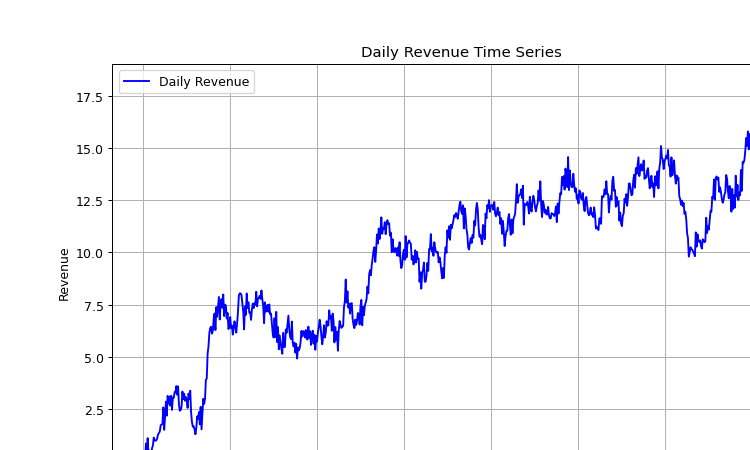

In [7]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data['Day'], data['Revenue'], label='Daily Revenue', color='blue')
plt.title('Daily Revenue Time Series')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Day        0
Revenue    0
dtype: int64


In [ ]:
#### C3: STATIONARITY #######

In [12]:
# Perform the ADF test
result = adfuller(data['Revenue'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.924612157310183
p-value: 0.3205728150793967
Critical Values:
	1%: -3.4393520240470554
	5%: -2.8655128165959236
	10%: -2.5688855736949163


In [13]:
# Interpretation of results
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

The time series is not stationary.


In [ ]:
##### C4: STEPS TO PREPARE THE DATA

In [17]:
# Apply first order differencing
data['Revenue_diff'] = data['Revenue'].diff()

In [18]:
# Drop the first NaN value resulting from differencing
data_diff = data.dropna()

In [19]:
# Perform the ADF test on the differenced data
result_diff = adfuller(data_diff['Revenue_diff'])
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])
print('Critical Values after differencing:')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

ADF Statistic after differencing: -44.87452719387599
p-value after differencing: 0.0
Critical Values after differencing:
	1%: -3.4393520240470554
	5%: -2.8655128165959236
	10%: -2.5688855736949163


In [20]:
# Interpretation of results
if result_diff[1] <= 0.05:
    print("The differenced time series is stationary.")
else:
    print("The differenced time series is not stationary.")

The differenced time series is stationary.


In [27]:
# Define the split point for training and test sets
split_point = int(0.8 * len(data))

In [28]:
# Split the data into training and test sets
train = data[:split_point]
test = data[split_point:]

In [29]:
# Display the sizes of the training and test sets
print("Training set size:", len(train))
print("Test set size:", len(test))

Training set size: 584
Test set size: 147


In [31]:
#csv file
data.to_csv('C:/Users/siree/OneDrive/Desktop/WGU/D213/TASK_1/SIREEN_SHABAN_D213_TASK1_clean_data.csv')

In [ ]:
#### D1: REPORT FINDINGS AND VISUALIZATIONS ######

<IPython.core.display.Javascript object>


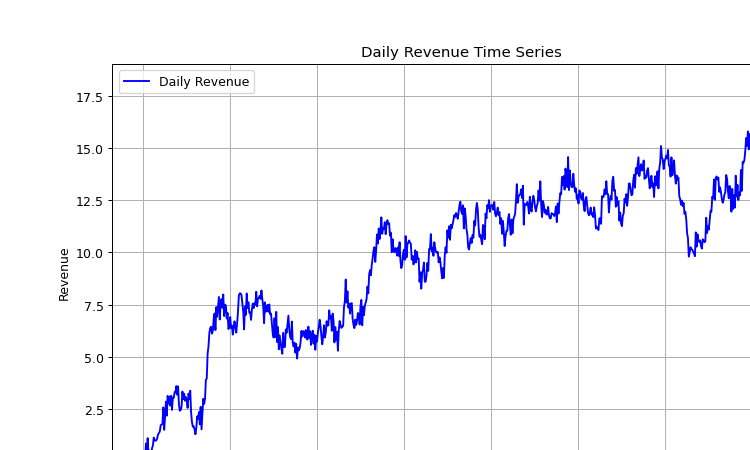

In [33]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data['Day'], data['Revenue'], label='Daily Revenue', color='blue')
plt.title('Daily Revenue Time Series')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Decompose the time series
decomposition = seasonal_decompose(data['Revenue'], model='additive', period=365)
trend = decomposition.trend

<IPython.core.display.Javascript object>


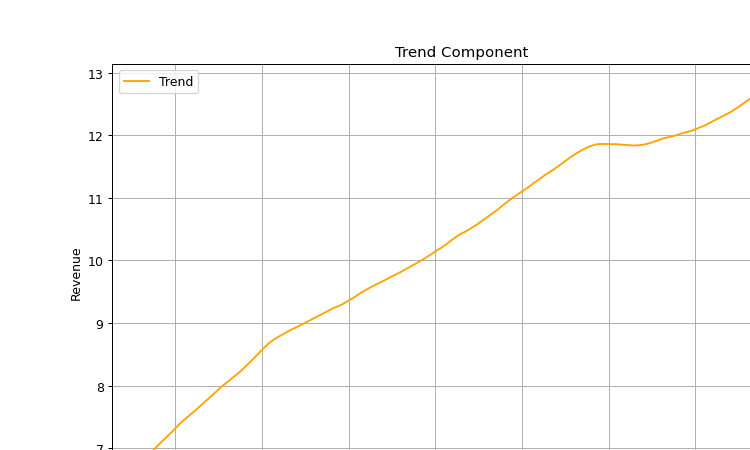

In [35]:
# Plot the trend component
plt.figure(figsize=(10, 6))
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


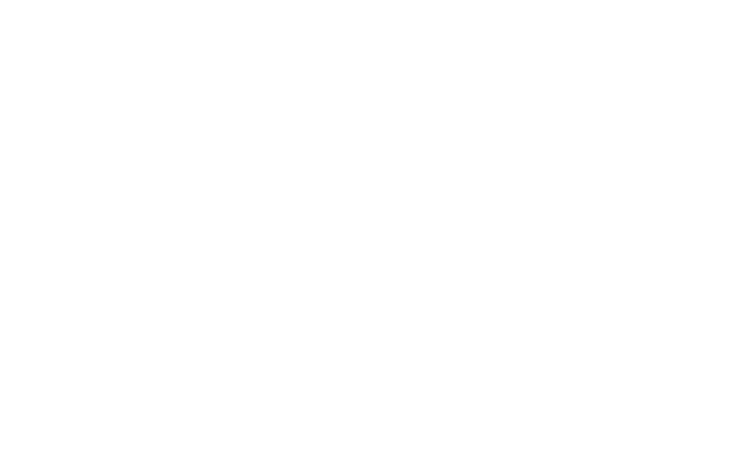

<IPython.core.display.Javascript object>


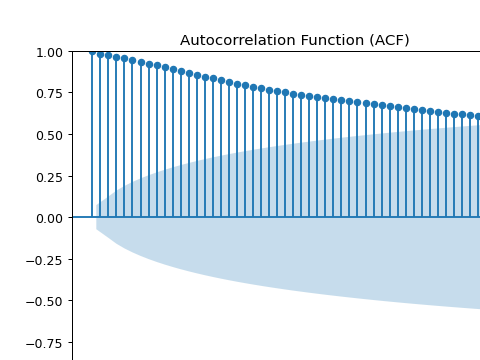

In [43]:
# Plot the autocorrelation function
plt.figure(figsize=(10, 6))
plot_acf(data['Revenue'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<IPython.core.display.Javascript object>


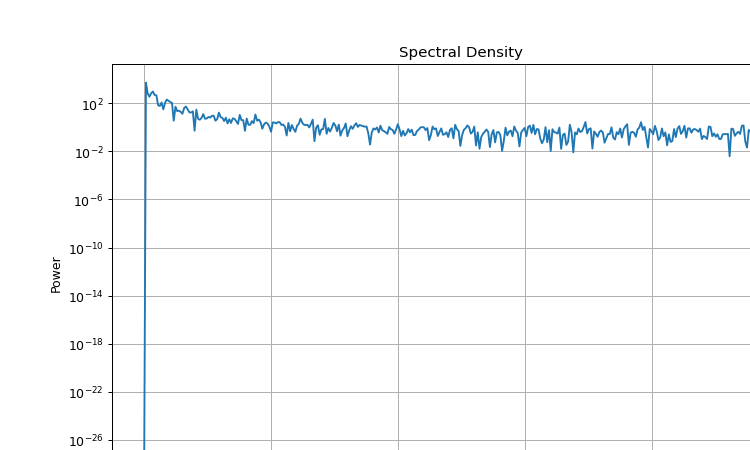

In [38]:
# Compute and plot the spectral density
frequencies, spectrum = periodogram(data['Revenue'])
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, spectrum)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


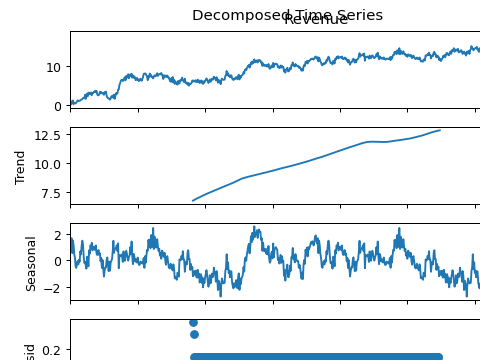

In [39]:
# Plot the decomposed time series
decomposition.plot()
plt.suptitle('Decomposed Time Series')
plt.show()

In [40]:
residual = decomposition.resid

<IPython.core.display.Javascript object>


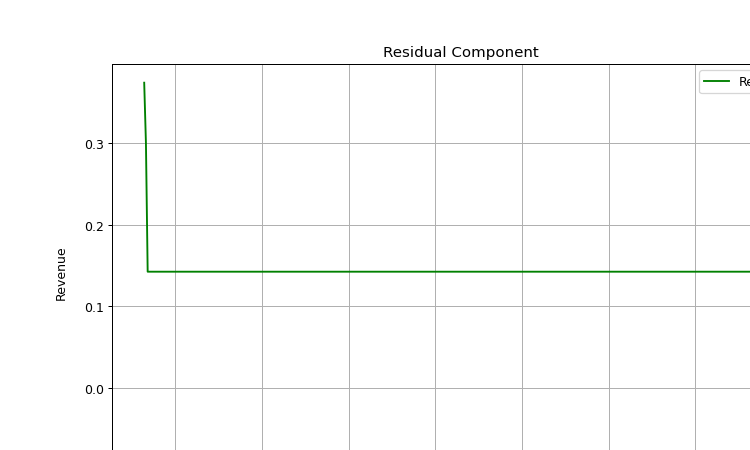

In [41]:
# Plot the residual component
plt.figure(figsize=(10, 6))
plt.plot(residual, label='Residuals', color='green')
plt.title('Residual Component')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
###### D2: ARIMA MODEL ######

<IPython.core.display.Javascript object>


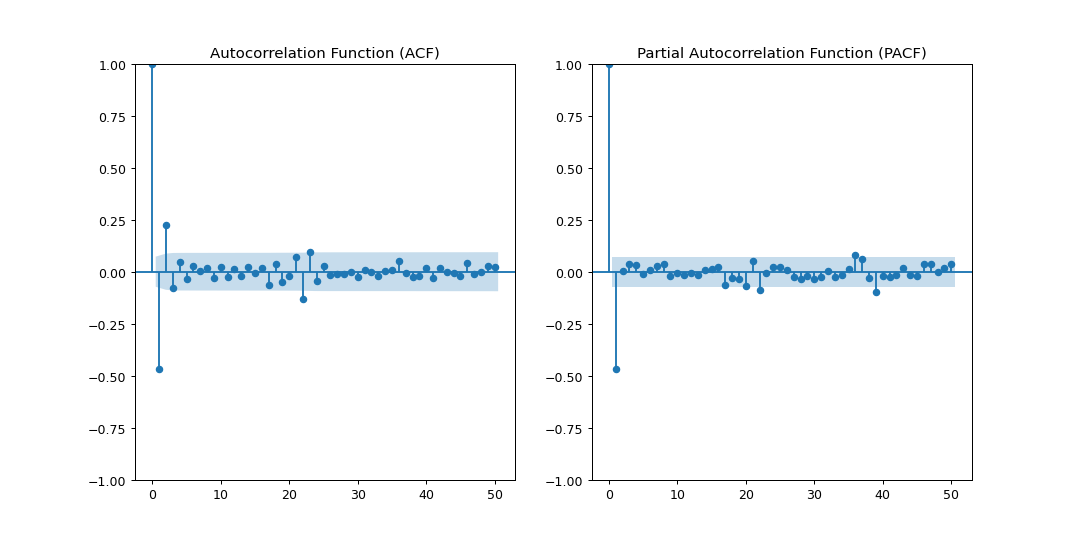

In [52]:
# Plot the ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(data['Revenue_diff'].dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(data['Revenue_diff'].dropna(), lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()

In [54]:
#ARIMA MODEL
p = 2
d = 1
q = 2

model = ARIMA(data['Revenue'], order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  731
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -489.046
Date:                Thu, 08 Aug 2024   AIC                            988.093
Time:                        07:16:01   BIC                           1011.058
Sample:                             0   HQIC                           996.953
                                - 731                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3055      0.286      1.067      0.286      -0.256       0.867
ar.L2          0.3132      0.178      1.761      0.078      -0.035       0.662
ma.L1         -0.7702      0.290     -2.660      0.0

In [ ]:
##### D3: FORECASTING USING ARIMA MODEL ######

In [55]:
# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

<IPython.core.display.Javascript object>


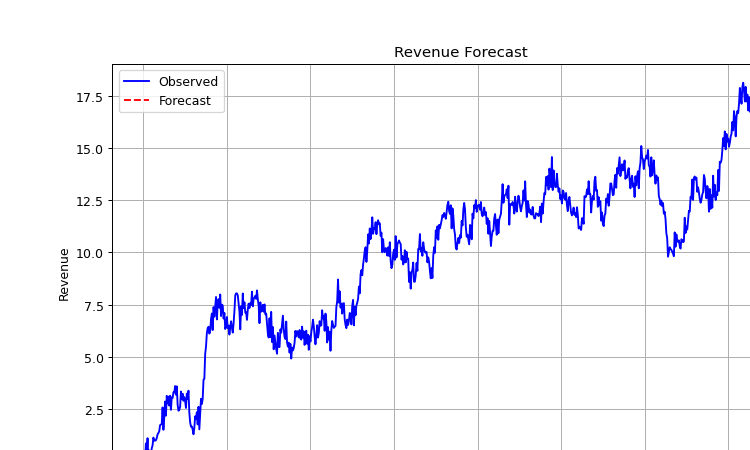

In [56]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Day'], data['Revenue'], label='Observed', color='blue')
plt.plot(range(len(data), len(data) + forecast_steps), forecast, label='Forecast', color='red', linestyle='--')
plt.title('Revenue Forecast')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Display forecasted values
forecast

731    16.385814
732    16.457459
733    16.405751
734    16.412391
735    16.398225
736    16.395976
737    16.390852
738    16.388582
739    16.386284
740    16.384871
741    16.383719
742    16.382925
743    16.382321
744    16.381888
745    16.381566
746    16.381333
747    16.381160
748    16.381035
749    16.380942
750    16.380875
751    16.380825
752    16.380789
753    16.380762
754    16.380743
755    16.380728
756    16.380718
757    16.380710
758    16.380704
759    16.380700
760    16.380697
Name: predicted_mean, dtype: float64

In [71]:
#Get AIC and BIC
aic = model_fit.aic
bic = model_fit.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")

AIC: 988.0925449238312
BIC: 1011.0577675945433


In [61]:
#Get the residuals from the model
residuals = model_fit.resid

In [64]:
#Perform the Ljung-Box test
ljung_box_test = acorr_ljungbox(residuals, lags=[20], return_df=True)

In [67]:
#Calculate error metrics
mae = mean_absolute_error(data['Revenue'][:len(model_fit.fittedvalues)], model_fit.fittedvalues)
rmse = np.sqrt(mean_squared_error(data['Revenue'][:len(model_fit.fittedvalues)], model_fit.fittedvalues))


In [70]:
#Display the results
ljung_box_test_result = ljung_box_test
error_metrics = {
    'Mean Absolute Error (MAE)': mae,
    'Root Mean Squared Error (RMSE)': rmse
}

print("Ljung-Box Test Result:")
print(ljung_box_test_result)
print("\nError Metrics:")
print(error_metrics)

Ljung-Box Test Result:
     lb_stat  lb_pvalue
20  9.903743   0.969884

Error Metrics:
{'Mean Absolute Error (MAE)': 0.3798691197217034, 'Root Mean Squared Error (RMSE)': 0.47243066161654834}


In [ ]:
##### E2: ANNOTATED VISUALIZATION ######

In [74]:
#Forecast
forecast = model_fit.get_forecast(steps=len(test))
forecast_index = test.index
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

<IPython.core.display.Javascript object>


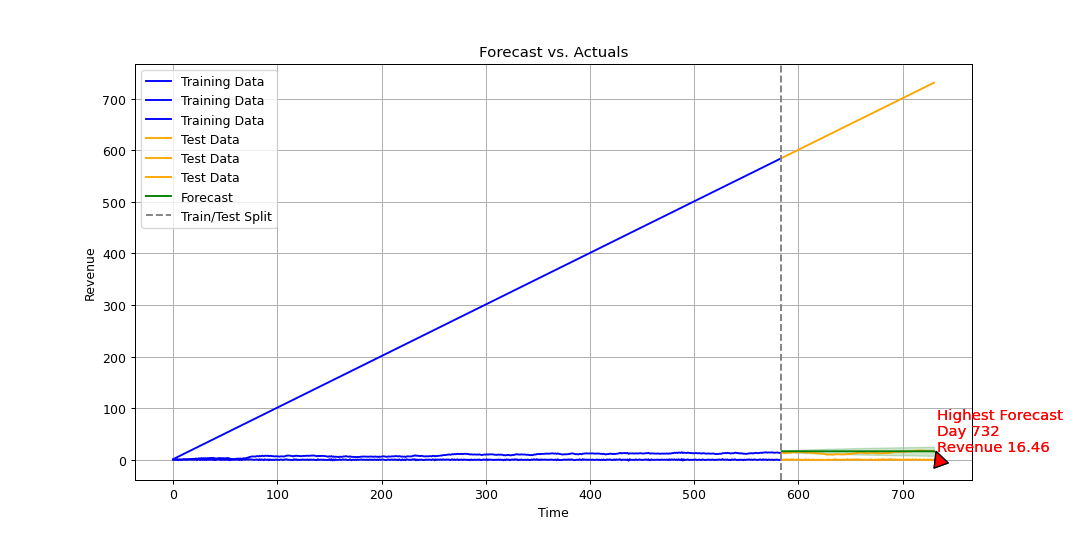

In [84]:
#Create the plot
plt.figure(figsize=(12, 6))

#Plot the training data
plt.plot(train, label='Training Data', color='blue')

#Plot the test data
plt.plot(test, label='Test Data', color='orange')

#Plot the forecast
plt.plot(forecast_index, forecast_values, label='Forecast', color='green')

#Plot the confidence intervals
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.2)

#Add annotations
plt.axvline(x=train.index[-1], color='grey', linestyle='--', label='Train/Test Split')
plt.title('Forecast vs. Actuals')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

In [86]:
#Annotate the highest forecast value
max_forecast_index = forecast_values.idxmax()
max_forecast_value = forecast_values[max_forecast_index]
plt.annotate(f'Highest Forecast\nDay {max_forecast_index}\nRevenue {max_forecast_value:.2f}',
             xy=(max_forecast_index, max_forecast_value),
             xytext=(max_forecast_index + 1, max_forecast_value + 0.2),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12,
             color='red')
plt.show()